In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scratchNNlib import NN
from scratchNNlib.Layers import LinearLayer, MomentumLinearLayer, Dropout
from scratchNNlib.Layers.ConvolutionLayers import Convolution, Reshape
from scratchNNlib.Layers.ActivationLayers import Sigmoid, ReLU, Softmax, Tanh
from scratchNNlib.Loss import BinaryCrossEntropy

In [2]:
test_data = pd.read_csv('Training_Data/mnist_test.csv')
train_data = pd.read_csv('Training_Data/mnist_train.csv')

In [3]:
## 1D Data formats, superseded in next coded block by 2D formats

x_train = train_data.iloc[:,1:].to_numpy()
y_train = train_data['label'].to_numpy()

x_test = test_data.iloc[:,1:].to_numpy()
y_test = test_data['label'].to_numpy()

## Normalizing Data
x_train = x_train/255
x_test = x_test/255

In [4]:
x_train = x_train.reshape(60000, 1, 28, 28)[:256]
x_test = x_test.reshape(10000, 1, 28, 28)

y_train = y_train.reshape(60000, 1, 1)[:256]
y_test = y_test.reshape(10000, 1, 1)


In [5]:
def one_hot_encode(num: int, size: int = 10):
    out = np.zeros((1, size))
    out[0][num] =+ 1
    return out

In [21]:
class MNISTNeuralCNN(NN):
    def __init__(self):
        super().__init__()
        self.chain = [
            Convolution((1, 28, 28), 15, 2),
            ReLU(),
            #Dropout(0.3),
            Convolution((2, 14, 14), 12, 3),
            ReLU(),
            #Dropout(0.3),
            Convolution((3, 3, 3), 2, 2),
            Reshape((2, 2, 2), (2 * 2 * 2, 1)),
            ReLU(),
            #Dropout(0.02),
            MomentumLinearLayer(2 * 2 * 2, 10),
            Softmax(),
        ]

epoch 1/60   error=0.272776
epoch 2/60   error=0.259779
epoch 3/60   error=0.249416
epoch 4/60   error=0.238632
epoch 5/60   error=0.227297
epoch 6/60   error=0.217202
epoch 7/60   error=0.208869
epoch 8/60   error=0.201352
epoch 9/60   error=0.194227
epoch 10/60   error=0.188870
epoch 11/60   error=0.183475
epoch 12/60   error=0.177150
epoch 13/60   error=0.169995
epoch 14/60   error=0.160563
epoch 15/60   error=0.153052
epoch 16/60   error=0.147205
epoch 17/60   error=0.142201
epoch 18/60   error=0.137442
epoch 19/60   error=0.133429
epoch 20/60   error=0.129410
epoch 21/60   error=0.125937
epoch 22/60   error=0.122777
epoch 23/60   error=0.119472
epoch 24/60   error=0.116416
epoch 25/60   error=0.113651
epoch 26/60   error=0.110720
epoch 27/60   error=0.107895
epoch 28/60   error=0.105156
epoch 29/60   error=0.102177
epoch 30/60   error=0.099836
epoch 31/60   error=0.097221
epoch 32/60   error=0.094500
epoch 33/60   error=0.091845
epoch 34/60   error=0.088692
epoch 35/60   error=0.0

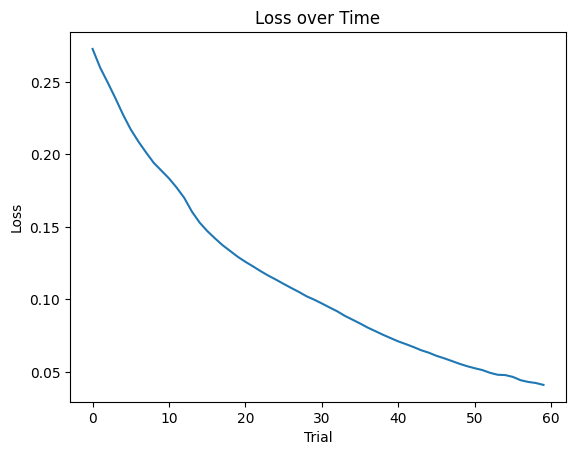

In [22]:
if __name__ == "__main__":
    epochs = 60
    lr = 0.006
    
    loss_function = BinaryCrossEntropy()
    model = MNISTNeuralCNN()

    
    samples = len(x_train)
    
    toPlot = [[i for i in range(epochs)], []]

    for i in range(epochs):
        error = 0
        # if i % 32 == 0:
        #     lr /= 2
        for sample in range(samples):
            output = model(x_train[sample])
            #print(f'NN output: {output}, expected value: {y_train[sample]}')
            #print(f'sample: {one_hot_encode(y_train[sample])}')

            error += loss_function(output, one_hot_encode(y_train[sample]).T)
            
            #print(f'Loss: {error}')
        
            loss = loss_function.backward()
            #print(f'Gradiant: {loss}')
            model.backProp(loss, lr)
        error /= samples
        toPlot[1].append(error)
        print('epoch %d/%d   error=%f' % (i+1, epochs, error))
        

plt.plot(*toPlot)
plt.title('Loss over Time')
plt.xlabel('Trial')
plt.ylabel('Loss')
plt.show()

In [23]:
scores = []
for x in x_test:
    scores.append(model(x))
predicted_class = np.argmax(scores, axis=1)
y = y_test.reshape(10000, 1)
print('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.63


In [20]:
scores = []
for x in x_test:
    scores.append(model(x, training=False))
predicted_class = np.argmax(scores, axis=1)
y = y_test.reshape(10000, 1)
print('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.42


In [ ]:
scores_train = []
for x in x_train:
    scores_train.append(model(x, training=False))
predicted_class_train = np.argmax(scores_train, axis=1)
y_t = y_train.reshape(256, 1)
print('training accuracy on training set: %.2f' % (np.mean(predicted_class_train == y_t)))

training accuracy on training set: 0.95
